In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')
jovian.set_colab_id('12WtdSuJ6vpfCjkC08Z6DX7_2w2O01sKB')

     |████████████████████████████████| 71kB 7.7MB/s 


# us-accidents-analysis

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········


[jovian] Error: The current API key is invalid or expired.


[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pranaviganti21/us-accidents-analysis


'https://jovian.ai/pranaviganti21/us-accidents-analysis'

# US Accidents Exploratory Data Analysis

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pranaviganti
Your Kaggle Key: ··········


  6%|▌         | 17.0M/290M [00:00<00:01, 173MB/s]

100%|██████████| 290M/290M [00:01<00:00, 203MB/s]


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20_Updated.csv'

## Data Preparation and Cleaning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = {'int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64'}

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [ ]:
df.isna()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906606,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906607,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2906608,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Percentage of missing values per column

In [ ]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

In [ ]:
missing_percentages[ missing_percentages != 0]

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
dtype: float64

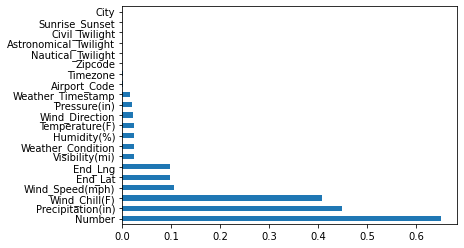

In [ ]:
missing_percentages[ missing_percentages != 0].plot(kind = 'barh')

Remove columns that you don't want to use

# Exploratory Analysis and Visualization

Columns being analysed:
1. City
2. Start time
3. Start lat, Start long



## City

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.City

0                Greenville
1                 Charlotte
2                 Los Gatos
3               Carson City
4           Fort Lauderdale
                 ...       
2906605             Houston
2906606              Colton
2906607               Miami
2906608      Salt Lake City
2906609    Colorado Springs
Name: City, Length: 2906610, dtype: object

In [ ]:
cities = df.City.unique()
len(cities)

11790

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
               ...  
Cooper             1
Patten             1
Tollesboro         1
Holmen             1
Fouke              1
Name: City, Length: 11789, dtype: int64

In [ ]:
cities_by_accidents[:10]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

In [ ]:
'New York' in df.City

False

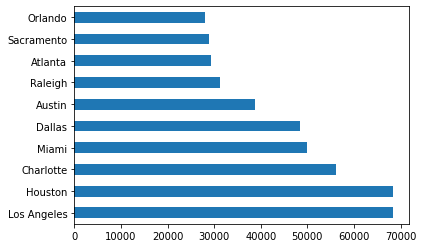

In [ ]:
cities_by_accidents[:10].plot(kind= 'barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

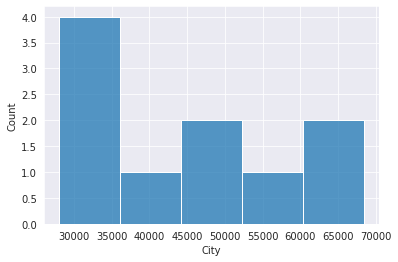

In [ ]:
sns.histplot(cities_by_accidents[:10])

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000 ]

In [ ]:
len(high_accident_cities) / len(cities)

0.04351145038167939

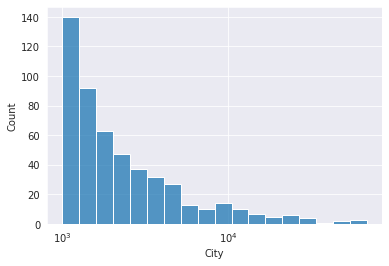

In [ ]:
sns.histplot(high_accident_cities, log_scale=True)

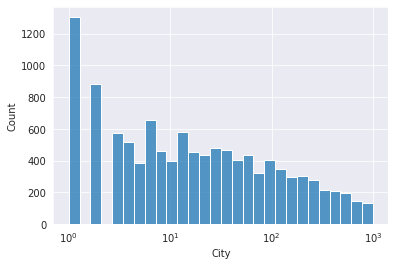

In [ ]:
sns.histplot(low_accident_cities , log_scale=True)

In [ ]:
cities_by_accidents[cities_by_accidents == 1]

Levan          1
Lairdsville    1
Hagerhill      1
Elk Garden     1
Bagdad         1
              ..
Cooper         1
Patten         1
Tollesboro     1
Holmen         1
Fouke          1
Name: City, Length: 1306, dtype: int64

### Start time

In [ ]:
df.Start_Time

0          2019-05-21 08:29:55
1          2019-10-07 17:43:09
2          2020-12-13 21:53:00
3          2018-04-17 16:51:23
4          2016-08-31 17:40:49
                  ...         
2906605    2018-06-28 08:49:01
2906606    2019-01-10 02:01:01
2906607    2020-11-23 12:52:00
2906608    2019-12-29 22:38:00
2906609    2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: object

In [ ]:
df.Start_Time = pd.to_datetime(df.Start_Time)

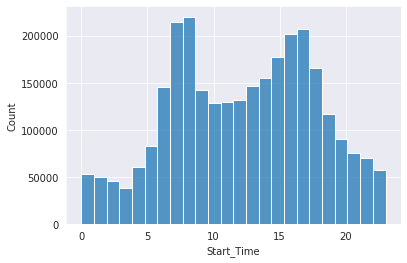

In [ ]:
sns.histplot(df.Start_Time.dt.hour, bins=24)

- a high number of accidents take place between 6-10 am. This might be due to the hurry to each their work place on time.
- next highest is during 3-6 pm which might be the after office hours.

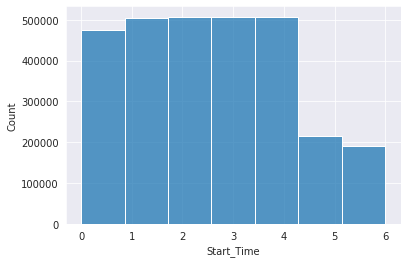

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7)

Is the distribution of the accidents by hour the same on weekends as on weekdays?

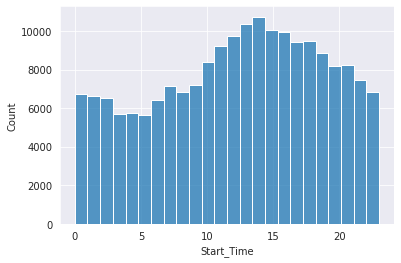

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.histplot(sundays_start_time.dt.hour, bins=24)

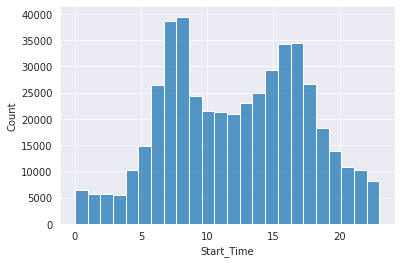

In [ ]:
mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.histplot(mondays_start_time.dt.hour, bins=24)

On Sundays the peak occurs between 10 am and 3 pm unlike weekdays

## Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

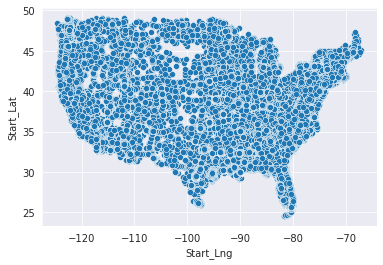

In [ ]:
sns.scatterplot(x=df.Start_Lng , y=df.Start_Lat)

# Questions Answered

1. Which 5 states have the highest number of accidents?
2. Does New York show up in the data?
3. Among the top 100 cities in the accidents, which states do they belong to more frequently?
4. What time of the day are the accidents more frequent in?
5. Which days of the week have the most accidents?


# Summary and Conclusion

Insights:
- No data for New York
- the number of accidents per city decreases exponentially
- less than 4% of cities have more than 1000 yearly accidents
- over 1200 cities have reported just one accident

## Areas for future work
- Season wise analysis
- State wise and City wise analysis

In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pranaviganti21/us-accidents-analysis


'https://jovian.ai/pranaviganti21/us-accidents-analysis'